In [189]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

In [204]:
warnings.filterwarnings("ignore")

## Import Data

In [191]:
data1 = pd.read_csv("heart.csv")
np.random.seed(22)
data = data1.sample(frac=1).reset_index()
data.head()

,index,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
1,56,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
2,302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0
3,255,45,1,0,142,309,0,0,147,1,0.0,1,3,3,0
4,41,48,1,1,130,245,0,0,180,0,0.2,1,0,2,1


### Data information

In [192]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [193]:
data1.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

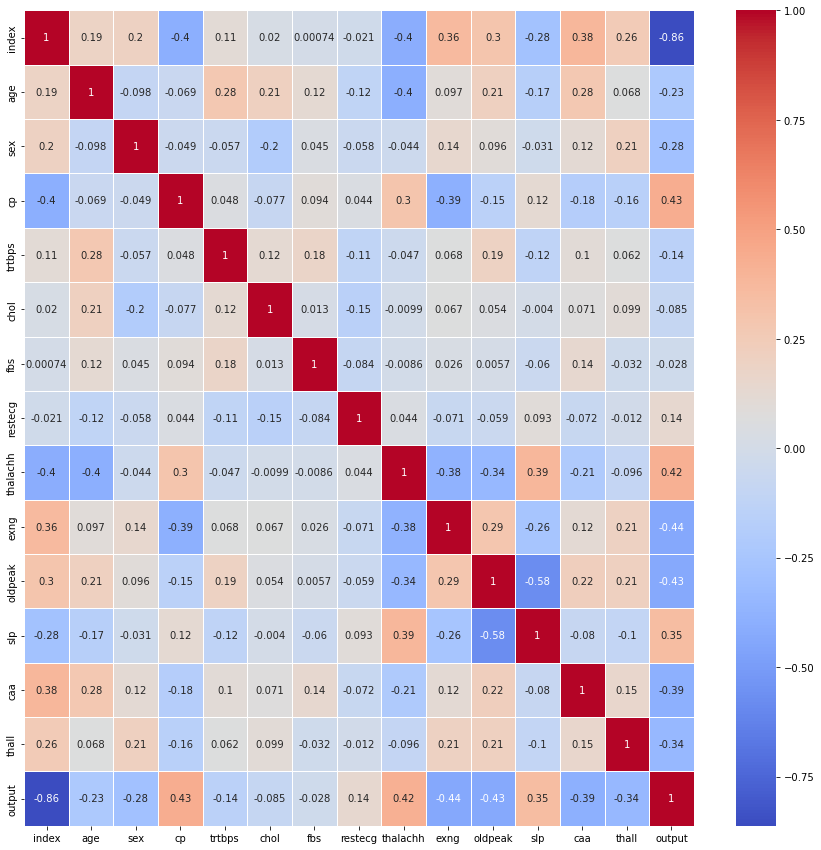

In [194]:
corr = data.corr()
plt.figure(figsize=(15,15))
gr = sns.heatmap(corr,cmap="coolwarm", annot=True,linewidth=1)
bottom,top = gr.get_ylim()

In [195]:
x = data.drop("output",axis=1)
y = data["output"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

## Support vender Classifier

### kernel 'rbf'

In [196]:
clf = svm.SVC(kernel="rbf")
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.989010989010989

### kernel 'linear'

In [198]:
clf2 = svm.SVC(kernel="linear")
clf2.fit(x_train,y_train)
clf2.score(x_test,y_test)

1.0

### kernel 'poly'

In [199]:
clf3 = svm.SVC(kernel="poly")
clf3.fit(x_train,y_train)
clf3.score(x_test,y_test)

0.967032967032967

## Logistic Regression

In [205]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.989010989010989

## Random Forest Classifier

In [206]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.978021978021978

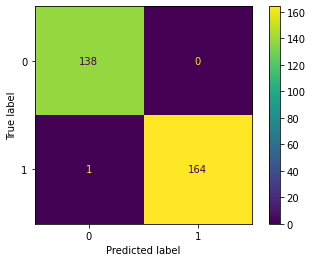

In [202]:
ConfusionMatrixDisplay.from_estimator(estimator=lr,X=x,y=y)

In [207]:
cross_val_score(lr, x, y, cv=5, scoring=None)

array([1.        , 0.98360656, 0.96721311, 0.98333333, 1.        ])